In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns 

In [2]:
v1 = pd.read_csv("integrated2.csv")
for i in v1.columns:
    print(i)

FileNotFoundError: [Errno 2] No such file or directory: 'integrated2.csv'

In [3]:
v1 = v1.drop(columns=['Unnamed: 0' , "geometry" , "CNT_FULLNAME"])

Since the goal is to build clusters and not extracting information from the dataset  we can remove the high correlated data from the dataframe like subSoil / topSoil correlated data 

In [4]:
v1 = v1.drop(columns=['sand % subsoil','silt% subsoil', 'clay % subsoil', 'pH water subsoil','N % subsoil',
        'BS % subsoil','CEC subsoil', 'CEC Clay subsoil','CaCO3 % subsoil',  'BD subsoil'])

We also drop the correlated top soil chimical components

In [5]:
v1 = v1.drop(columns= ['BS % topsoil','BD topsoil'])

In [6]:
v1

,lat,lon,PSurf1,PSurf10,PSurf11,PSurf12,PSurf13,PSurf14,PSurf15,PSurf16,...,clay % topsoil,pH water topsoil,OC % topsoil,OC % subsoil,N % topsoil,CEC topsoil,CEC clay topsoil,CaCO3 % topsoil,C/N topsoil,C/N subsoil
0,-8.25,27.25,89931.291146,89935.560190,89857.437607,89719.336024,89919.630089,89795.942393,89822.866530,89845.084958,...,22.11,7.22,0.583,0.336,0.063,12.58,57.1,5.46,9.8,9.9
1,-8.25,27.75,88198.302755,88202.255054,88144.626482,88011.359357,88205.834726,88097.959524,88101.279536,88143.110607,...,19.09,7.87,0.501,0.288,0.060,9.98,57.8,18.23,10.3,10.8
2,-8.25,28.25,89235.961901,89234.871446,89175.960774,89039.490220,89237.955708,89145.462488,89148.886125,89189.423988,...,19.09,7.87,0.501,0.288,0.060,9.98,57.8,18.23,10.3,10.8
3,-8.25,28.75,89689.187172,89694.181381,89638.232685,89500.870935,89700.801429,89613.034661,89615.432875,89656.726643,...,24.58,7.39,0.678,0.405,0.113,10.87,56.7,8.54,10.3,10.8
4,-7.75,27.25,93016.242297,93018.701482,92912.807863,92766.109494,92984.016548,92840.870970,92899.681970,92893.402655,...,0.00,0.00,0.000,0.000,0.000,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,10.75,24.25,95072.465089,94959.076833,94828.393851,94597.915542,94820.357179,94638.193423,94533.842458,94701.787935,...,0.00,0.00,0.000,0.000,0.000,0.00,0.0,0.00,0.0,0.0
585,11.25,23.25,94380.135922,94266.675756,94140.533315,93925.996935,94145.756238,93967.888226,93894.973268,94048.788238,...,12.45,3.55,0.485,0.200,0.065,5.20,27.5,0.05,5.5,4.0
586,11.25,23.75,94442.190333,94333.525786,94204.438512,93982.367929,94202.245667,94021.829244,93923.329673,94090.795161,...,0.00,0.00,0.000,0.000,0.000,0.00,0.0,0.00,0.0,0.0
587,11.25,24.25,94815.380714,94705.219577,94574.246238,94340.447714,94563.048720,94380.986940,94259.847762,94441.106321,...,24.80,7.70,0.330,0.230,0.100,8.70,66.0,13.10,8.0,11.0


Normlize the data for better distance calculation

In [7]:
# usin the previous part normalization function 
def MinMax_Normalization(df):
    df_minmax = pd.DataFrame()
    for column in df.columns:
        if df[column].dtype == 'float64' and column not in ["lat","lon"]:
            bas = min(df[column])
            haut = max(df[column])
            gap = haut - bas
            df_minmax[column] = (df[column] - bas)/gap
    return df_minmax

v1 = MinMax_Normalization(v1)
v1

C:\Users\wahee\AppData\Local\Temp\ipykernel_8996\1251721374.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_minmax[column] = (df[column] - bas)/gap
C:\Users\wahee\AppData\Local\Temp\ipykernel_8996\1251721374.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_minmax[column] = (df[column] - bas)/gap
C:\Users\wahee\AppData\Local\Temp\ipykernel_8996\1251721374.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider jo

,PSurf1,PSurf10,PSurf11,PSurf12,PSurf13,PSurf14,PSurf15,PSurf16,PSurf17,PSurf18,...,clay % topsoil,pH water topsoil,OC % topsoil,OC % subsoil,N % topsoil,CEC topsoil,CEC clay topsoil,CaCO3 % topsoil,C/N topsoil,C/N subsoil
0,0.643969,0.650159,0.649107,0.650683,0.648146,0.649672,0.648948,0.647550,0.647135,0.647381,...,0.366788,0.749740,0.241808,0.452830,0.217241,0.318642,0.758300,0.162791,0.471154,0.61875
1,0.560761,0.566320,0.565992,0.567405,0.565297,0.567261,0.565956,0.565361,0.564443,0.565555,...,0.316689,0.817238,0.207798,0.388140,0.206897,0.252786,0.767596,0.543530,0.495192,0.67500
2,0.610584,0.616267,0.616038,0.617535,0.615192,0.618101,0.616457,0.615888,0.614997,0.616900,...,0.316689,0.817238,0.207798,0.388140,0.206897,0.252786,0.767596,0.543530,0.495192,0.67500
3,0.632345,0.638483,0.638470,0.640031,0.637567,0.640795,0.638948,0.638454,0.637617,0.640012,...,0.407764,0.767394,0.281211,0.545822,0.389655,0.275329,0.752988,0.254621,0.495192,0.67500
4,0.792091,0.799289,0.797369,0.799240,0.796287,0.797456,0.797271,0.794755,0.795127,0.795795,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.890818,0.893144,0.890322,0.888556,0.885061,0.884688,0.876048,0.882083,0.881109,0.879824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
585,0.857577,0.859653,0.856944,0.855794,0.852449,0.852155,0.845250,0.850549,0.848879,0.849049,...,0.206536,0.368640,0.201161,0.269542,0.224138,0.131712,0.365206,0.001491,0.264423,0.25000
586,0.860556,0.862886,0.860045,0.858543,0.855180,0.854773,0.846617,0.852578,0.851415,0.850457,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
587,0.878475,0.880865,0.877990,0.876002,0.872622,0.872205,0.862840,0.869495,0.868750,0.866518,...,0.411413,0.799585,0.136873,0.309973,0.344828,0.220365,0.876494,0.390578,0.384615,0.68750


In [8]:
v1.value_counts()

PSurf1    PSurf10   PSurf11   PSurf12   PSurf13   PSurf14   PSurf15   PSurf16   PSurf17   PSurf18   PSurf19   PSurf2    PSurf20   PSurf21   PSurf22   PSurf23   PSurf24   PSurf25   PSurf26   PSurf27   PSurf28   PSurf29   PSurf3    PSurf30   PSurf31   PSurf32   PSurf33   PSurf34   PSurf35   PSurf36   PSurf37   PSurf38   PSurf39   PSurf4    PSurf40   PSurf41   PSurf42   PSurf43   PSurf44   PSurf45   PSurf46   PSurf47   PSurf48   PSurf49   PSurf5    PSurf50   PSurf51   PSurf52   PSurf6    PSurf7    PSurf8    PSurf9    Qair1     Qair10    Qair11    Qair12    Qair13    Qair14    Qair15    Qair16    Qair17    Qair18    Qair19    Qair2     Qair20    Qair21    Qair22    Qair23    Qair24    Qair25    Qair26    Qair27    Qair28    Qair29    Qair3     Qair30    Qair31    Qair32    Qair33    Qair34    Qair35    Qair36    Qair37    Qair38    Qair39    Qair4     Qair40    Qair41    Qair42    Qair43    Qair44    Qair45    Qair46    Qair47    Qair48    Qair49    Qair5     Qair50    Qair51    Qair52    

In [9]:
v1  = v1.drop_duplicates()
v1

,PSurf1,PSurf10,PSurf11,PSurf12,PSurf13,PSurf14,PSurf15,PSurf16,PSurf17,PSurf18,...,clay % topsoil,pH water topsoil,OC % topsoil,OC % subsoil,N % topsoil,CEC topsoil,CEC clay topsoil,CaCO3 % topsoil,C/N topsoil,C/N subsoil
0,0.643969,0.650159,0.649107,0.650683,0.648146,0.649672,0.648948,0.647550,0.647135,0.647381,...,0.366788,0.749740,0.241808,0.452830,0.217241,0.318642,0.758300,0.162791,0.471154,0.61875
1,0.560761,0.566320,0.565992,0.567405,0.565297,0.567261,0.565956,0.565361,0.564443,0.565555,...,0.316689,0.817238,0.207798,0.388140,0.206897,0.252786,0.767596,0.543530,0.495192,0.67500
2,0.610584,0.616267,0.616038,0.617535,0.615192,0.618101,0.616457,0.615888,0.614997,0.616900,...,0.316689,0.817238,0.207798,0.388140,0.206897,0.252786,0.767596,0.543530,0.495192,0.67500
3,0.632345,0.638483,0.638470,0.640031,0.637567,0.640795,0.638948,0.638454,0.637617,0.640012,...,0.407764,0.767394,0.281211,0.545822,0.389655,0.275329,0.752988,0.254621,0.495192,0.67500
4,0.792091,0.799289,0.797369,0.799240,0.796287,0.797456,0.797271,0.794755,0.795127,0.795795,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,0.890818,0.893144,0.890322,0.888556,0.885061,0.884688,0.876048,0.882083,0.881109,0.879824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
585,0.857577,0.859653,0.856944,0.855794,0.852449,0.852155,0.845250,0.850549,0.848879,0.849049,...,0.206536,0.368640,0.201161,0.269542,0.224138,0.131712,0.365206,0.001491,0.264423,0.25000
586,0.860556,0.862886,0.860045,0.858543,0.855180,0.854773,0.846617,0.852578,0.851415,0.850457,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
587,0.878475,0.880865,0.877990,0.876002,0.872622,0.872205,0.862840,0.869495,0.868750,0.866518,...,0.411413,0.799585,0.136873,0.309973,0.344828,0.220365,0.876494,0.390578,0.384615,0.68750


In [10]:
v1.columns

Index(['PSurf1', 'PSurf10', 'PSurf11', 'PSurf12', 'PSurf13', 'PSurf14',
       'PSurf15', 'PSurf16', 'PSurf17', 'PSurf18',
       ...
       'clay % topsoil', 'pH water topsoil', 'OC % topsoil', 'OC % subsoil',
       'N % topsoil', 'CEC topsoil', 'CEC clay topsoil', 'CaCO3 % topsoil',
       'C/N topsoil', 'C/N subsoil'],
      dtype='object', length=272)

Since none of the algorithme we will use is influenced by the presence of outliers we w'ont handle them

# 2. Regression algorithmes coding

# Pre implemented

1. Decision Tree

Scikit learn implementation of regression using Decision tree

Mean Squared Error: 0.0011522408916878094
R² Score: 0.9873472650836762


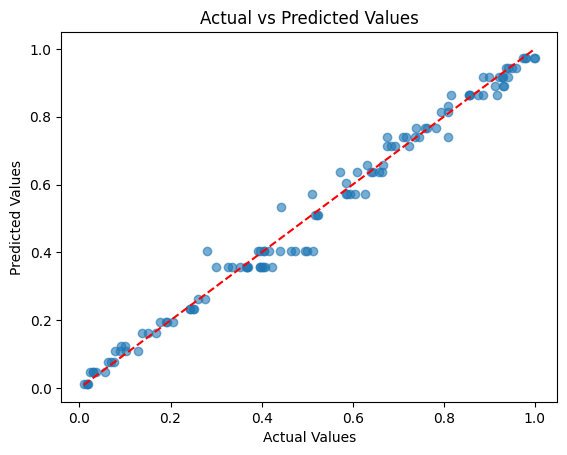

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Importing our dataset
target = "Qair1"
data = v1

columns = [col for col in v1.columns if col != target]
X, y = data[columns], data[target]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = DecisionTreeRegressor(criterion='squared_error', max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Visualize predictions
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


Reasons why SICKIT-Learn algorithm is better and much faster:
- I used loops while they use optimized vectorization
- I used dataframes whil they used more optimized data structures such as numpy arrays 
- They used lower level implementation, Since I worked withpure Python, they implemented it using Cython instead.
- My approch is sequential, meanwhile their's is based of threads, which exploits multiple cores in CPU and ensures parallelism

2. Random forest

SCIKIT-Learn implementation of random forest

In [41]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Example: Loading your dataset (replace with your dataset)
# df = pd.read_csv('your_data.csv')

# Assume 'target' is the column you're predicting
target = 'Rainf1'  # Replace with your target column name
features = [col for col in v1.columns if col != target]

# Splitting data into features (X) and target (y)
X = v1[features]  # Features
y = v1[target]    # Target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.007547244265316856
R² Score: 0.8607406586071666


# Hard Coded



Optimized Decision Tree

In [39]:
import numpy as np
import pandas as pd

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def calculate_mse(data, target):
    return ((data[target] - data[target].mean()) ** 2).mean()

def features_2_dict(df):
    return {feature: df.columns.get_loc(feature) for feature in df.columns}

def end_criterion(df, depth, max_depth):
    return len(df) < 2 or depth >= max_depth or len(df.columns) <= 1

def find_best_feature_and_threshold(df, target):
    best_feature = None
    best_threshold = None
    best_score = float("inf")


    features = [col for col in df.columns if col != target]
    print(f"looking for best feature among these: {features}")

    for feature in features:
        thresholds = df[feature].unique()
        thresholds.sort()

        for i in range(0, len(thresholds)-1):
            #threshold = (thresholds[i] + thresholds[i - 1]) / 2
            threshold = thresholds[i]

            left_data = df[df[feature] <= threshold]
            right_data = df[df[feature] > threshold]
            #print(f"\n left : {len(left_data)} \n write : {len(right_data)}")

            if len(left_data) == 0 or len(right_data) == 0:
                print(f" skip this feature: {feature}")
                continue

            mse_left = calculate_mse(left_data, target)
            mse_right = calculate_mse(right_data, target)
            score = (len(left_data) * mse_left + len(right_data) * mse_right) / len(df)

            if score < best_score:
                best_feature = feature
                best_threshold = threshold
                best_score = score
                #print(" Best So far updated!")
    
    print(f"\n\n Result: best feature: {best_feature} , best threshold: {best_threshold}\n Results comin from {len(df)} instances, and score of {best_score}\nResearch is done for this node\n")
    return best_feature, best_threshold, best_score

def split(df, feature, threshold):
    left_df = df[df[feature] <= threshold]
    right_df = df[df[feature] > threshold]
    return left_df, right_df

def leaf_value(df, target):
    print("created leaf")
    return df[target].mean()

def build_tree(df, target='Rainf1', depth=0, max_depth=200, min_impurity=2):
    if end_criterion(df, depth, max_depth):
        return Node(value=leaf_value(df, target))

    impurity = calculate_mse(df, target)
    best_feature, best_threshold, weighted_impurity = find_best_feature_and_threshold(df, target)

    if (weighted_impurity / impurity) * 100 < min_impurity:
        return Node(value=leaf_value(df, target))
    
    print(f"splitting on feature: {best_feature} with threshold = {best_threshold}")
    left_son, right_son = split(df, best_feature, best_threshold)
    print("affecting sons ...")
    return Node(
        feature=best_feature,
        threshold=best_threshold,
        left=build_tree(left_son, target, depth + 1, max_depth, min_impurity),
        right=build_tree(right_son, target, depth + 1, max_depth, min_impurity),
    )

def predict(root, line, features_indexes_dict):
    if root.left is None and root.right is None:
        return root.value

    feature_index = features_indexes_dict[root.feature]
    if line[feature_index] < root.threshold:
        return predict(root.left, line, features_indexes_dict)
    else:
        return predict(root.right, line, features_indexes_dict)

def fit(df, test_data_percent=20, target='Rainf1', max_depth=5, min_impurity=2):
    len_test = int(len(df) * test_data_percent / 100)
    train_data = df.iloc[:-len_test]
    test_data = df.iloc[-len_test:]
    print("creating root")
    root = build_tree(train_data, target, max_depth=max_depth, min_impurity=min_impurity)

    features_indexes = features_2_dict(df)
    predicted = [predict(root, line, features_indexes) for _, line in test_data.iterrows()]

    predicted = pd.Series(predicted, index=test_data.index)
    mse = ((test_data[target] - predicted) ** 2).mean()
    r_square = r2_score(test_data[target], predicted)
    mae = mean_absolute_error(test_data[target], predicted)
    rmse = root_mean_squared_error(test_data[target], predicted)

    return root, mse, r_square, mae, rmse

def r2_score(y_true, y_pred):
    ss_res = ((y_true - y_pred) ** 2).sum()
    ss_tot = ((y_true - y_true.mean()) ** 2).sum()
    return 1 - (ss_res / ss_tot)

def mean_absolute_error(y_true, y_pred):
    return abs(y_true - y_pred).mean()

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())

# Example Usage:
root, mse, r_square, mae, rmse = fit(v1, 20, 'Rainf1', max_depth=3)
print(f"MSE: {mse}, R^2: {r_square}, MAE: {mae}, RMSE: {rmse}")


creating root
looking for best feature among these: ['PSurf1', 'PSurf10', 'PSurf11', 'PSurf12', 'PSurf13', 'PSurf14', 'PSurf15', 'PSurf16', 'PSurf17', 'PSurf18', 'PSurf19', 'PSurf2', 'PSurf20', 'PSurf21', 'PSurf22', 'PSurf23', 'PSurf24', 'PSurf25', 'PSurf26', 'PSurf27', 'PSurf28', 'PSurf29', 'PSurf3', 'PSurf30', 'PSurf31', 'PSurf32', 'PSurf33', 'PSurf34', 'PSurf35', 'PSurf36', 'PSurf37', 'PSurf38', 'PSurf39', 'PSurf4', 'PSurf40', 'PSurf41', 'PSurf42', 'PSurf43', 'PSurf44', 'PSurf45', 'PSurf46', 'PSurf47', 'PSurf48', 'PSurf49', 'PSurf5', 'PSurf50', 'PSurf51', 'PSurf52', 'PSurf6', 'PSurf7', 'PSurf8', 'PSurf9', 'Qair1', 'Qair10', 'Qair11', 'Qair12', 'Qair13', 'Qair14', 'Qair15', 'Qair16', 'Qair17', 'Qair18', 'Qair19', 'Qair2', 'Qair20', 'Qair21', 'Qair22', 'Qair23', 'Qair24', 'Qair25', 'Qair26', 'Qair27', 'Qair28', 'Qair29', 'Qair3', 'Qair30', 'Qair31', 'Qair32', 'Qair33', 'Qair34', 'Qair35', 'Qair36', 'Qair37', 'Qair38', 'Qair39', 'Qair4', 'Qair40', 'Qair41', 'Qair42', 'Qair43', 'Qair44'

C:\Users\wahee\AppData\Local\Temp\ipykernel_8996\1619182745.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if line[feature_index] < root.threshold:


Optimized Random Forest

In [40]:
import numpy as np
import pandas as pd

def create_sample(df, max_features, target = 'Rainf1', bootstrap_percent = 60):
    """
    Create a random sample of the dataframe with specified features and bootstrap percentage.
    """
    sampled_features = np.random.choice(df.columns.difference([target]), max_features, replace=False)  # Exclude target
    sampled_df = df[list(sampled_features) + [target]].sample(
        frac=bootstrap_percent / 100, replace=True, random_state=None
    )
    return sampled_df

def Random_forest(df, nbr_trees=10, max_features=150, bootstrap_percent=60,
                  test_data_percent=20, target='Rainf1', max_depth=5, min_impurity=2):
    """
    Build a random forest by training multiple decision trees on bootstrapped samples of the data.
    """
    forest = []
    errors = []

    for i in range(nbr_trees):
        # Create random sampling
        df_sample = create_sample(df, max_features, target, bootstrap_percent)
        print(f"Sample created with features: {len(df_sample.columns) - 1} // rows: {len(df_sample)}")

        # Train a decision tree
        tree, mse, _, _, _ = fit(df, test_data_percent, target, max_depth=max_depth, min_impurity=min_impurity)
        print(f"\n\nTree {i+1} successfully created, mse = {mse:.4f}\n\n")

        # Store the tree and its error
        forest.append(tree)
        errors.append(mse)

    print("Forest complete!")
    return forest, errors

def RF_predict(forest, line, features_indexes):
    """
    Predict the output for a single line using the Random Forest ensemble.
    """
    predictions = np.array([predict(tree, line, features_indexes) for tree in forest])
    return predictions.mean()

def train_test_sets(df, test_data_percent):
    """
    Split the data into train and test sets based on the specified percentage.
    """
    len_test = int(len(df) * test_data_percent / 100)
    train_data = df[:-len_test]
    test_data = df[-len_test:]
    return train_data, test_data

def evaluate_rf(forest, df, target, test_data_percent=20):
    """
    Evaluate the Random Forest model on the test data.
    """
    # Split data
    _, test_data = train_test_sets(df, test_data_percent)

    # Generate feature indexes
    features_indexes = features_2_dict(df)

    # Predict values for test data
    predicted = np.array([RF_predict(forest, line, features_indexes) for _, line in test_data.iterrows()])

    # Actual target values
    y_true = test_data[target].values

    # Calculate metrics
    mse = np.mean((y_true - predicted) ** 2)
    r2 = 1 - mse / np.var(y_true)

    return mse, r2

# Main code
forest, mse_list = Random_forest(v1, nbr_trees=5, max_features=150, bootstrap_percent=80,
                                  test_data_percent=30, target='Rainf1', max_depth=5, min_impurity=2)

print("\n~~~~~~~~~~ Evaluation Part ~~~~~~~~~~\n")
print(f"Mean of MSE values of all trees: {np.mean(mse_list):.4f}\n")

mse, r2 = evaluate_rf(forest, v1, target='Rainf1', test_data_percent=20)
print(f"Overall Random Forest Evaluation:\nMSE: {mse:.4f}, R^2: {r2:.4f}\n")

# Single Prediction Test
print("\n~~~~~~~~~~ Prediction Test ~~~~~~~~~~\n")
line_as_df = v1.sample(1)
print(line_as_df.columns)
line = line_as_df.iloc[0]
my_dict = features_2_dict(v1)
prediction = RF_predict(forest, line, my_dict)

print(f"Prediction: {prediction:.4f}\nActual: {line_as_df['Rainf1'].values[0]:.4f}\n")


Sample created with features: 150 // rows: 471
creating root
looking for best feature among these: ['PSurf1', 'PSurf10', 'PSurf11', 'PSurf12', 'PSurf13', 'PSurf14', 'PSurf15', 'PSurf16', 'PSurf17', 'PSurf18', 'PSurf19', 'PSurf2', 'PSurf20', 'PSurf21', 'PSurf22', 'PSurf23', 'PSurf24', 'PSurf25', 'PSurf26', 'PSurf27', 'PSurf28', 'PSurf29', 'PSurf3', 'PSurf30', 'PSurf31', 'PSurf32', 'PSurf33', 'PSurf34', 'PSurf35', 'PSurf36', 'PSurf37', 'PSurf38', 'PSurf39', 'PSurf4', 'PSurf40', 'PSurf41', 'PSurf42', 'PSurf43', 'PSurf44', 'PSurf45', 'PSurf46', 'PSurf47', 'PSurf48', 'PSurf49', 'PSurf5', 'PSurf50', 'PSurf51', 'PSurf52', 'PSurf6', 'PSurf7', 'PSurf8', 'PSurf9', 'Qair1', 'Qair10', 'Qair11', 'Qair12', 'Qair13', 'Qair14', 'Qair15', 'Qair16', 'Qair17', 'Qair18', 'Qair19', 'Qair2', 'Qair20', 'Qair21', 'Qair22', 'Qair23', 'Qair24', 'Qair25', 'Qair26', 'Qair27', 'Qair28', 'Qair29', 'Qair3', 'Qair30', 'Qair31', 'Qair32', 'Qair33', 'Qair34', 'Qair35', 'Qair36', 'Qair37', 'Qair38', 'Qair39', 'Qair4', '

C:\Users\wahee\AppData\Local\Temp\ipykernel_8996\1619182745.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if line[feature_index] < root.threshold:




 Result: best feature: Rainf51 , best threshold: 0.28335408203487394
 Results comin from 413 instances, and score of 0.025230993690295182
Research is done for this node

splitting on feature: Rainf51 with threshold = 0.28335408203487394
affecting sons ...
looking for best feature among these: ['PSurf1', 'PSurf10', 'PSurf11', 'PSurf12', 'PSurf13', 'PSurf14', 'PSurf15', 'PSurf16', 'PSurf17', 'PSurf18', 'PSurf19', 'PSurf2', 'PSurf20', 'PSurf21', 'PSurf22', 'PSurf23', 'PSurf24', 'PSurf25', 'PSurf26', 'PSurf27', 'PSurf28', 'PSurf29', 'PSurf3', 'PSurf30', 'PSurf31', 'PSurf32', 'PSurf33', 'PSurf34', 'PSurf35', 'PSurf36', 'PSurf37', 'PSurf38', 'PSurf39', 'PSurf4', 'PSurf40', 'PSurf41', 'PSurf42', 'PSurf43', 'PSurf44', 'PSurf45', 'PSurf46', 'PSurf47', 'PSurf48', 'PSurf49', 'PSurf5', 'PSurf50', 'PSurf51', 'PSurf52', 'PSurf6', 'PSurf7', 'PSurf8', 'PSurf9', 'Qair1', 'Qair10', 'Qair11', 'Qair12', 'Qair13', 'Qair14', 'Qair15', 'Qair16', 'Qair17', 'Qair18', 'Qair19', 'Qair2', 'Qair20', 'Qair21', 'Q

C:\Users\wahee\AppData\Local\Temp\ipykernel_8996\1619182745.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if line[feature_index] < root.threshold:




 Result: best feature: Rainf51 , best threshold: 0.28335408203487394
 Results comin from 413 instances, and score of 0.025230993690295182
Research is done for this node

splitting on feature: Rainf51 with threshold = 0.28335408203487394
affecting sons ...
looking for best feature among these: ['PSurf1', 'PSurf10', 'PSurf11', 'PSurf12', 'PSurf13', 'PSurf14', 'PSurf15', 'PSurf16', 'PSurf17', 'PSurf18', 'PSurf19', 'PSurf2', 'PSurf20', 'PSurf21', 'PSurf22', 'PSurf23', 'PSurf24', 'PSurf25', 'PSurf26', 'PSurf27', 'PSurf28', 'PSurf29', 'PSurf3', 'PSurf30', 'PSurf31', 'PSurf32', 'PSurf33', 'PSurf34', 'PSurf35', 'PSurf36', 'PSurf37', 'PSurf38', 'PSurf39', 'PSurf4', 'PSurf40', 'PSurf41', 'PSurf42', 'PSurf43', 'PSurf44', 'PSurf45', 'PSurf46', 'PSurf47', 'PSurf48', 'PSurf49', 'PSurf5', 'PSurf50', 'PSurf51', 'PSurf52', 'PSurf6', 'PSurf7', 'PSurf8', 'PSurf9', 'Qair1', 'Qair10', 'Qair11', 'Qair12', 'Qair13', 'Qair14', 'Qair15', 'Qair16', 'Qair17', 'Qair18', 'Qair19', 'Qair2', 'Qair20', 'Qair21', 'Q

C:\Users\wahee\AppData\Local\Temp\ipykernel_8996\1619182745.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if line[feature_index] < root.threshold:




 Result: best feature: Rainf51 , best threshold: 0.28335408203487394
 Results comin from 413 instances, and score of 0.025230993690295182
Research is done for this node

splitting on feature: Rainf51 with threshold = 0.28335408203487394
affecting sons ...
looking for best feature among these: ['PSurf1', 'PSurf10', 'PSurf11', 'PSurf12', 'PSurf13', 'PSurf14', 'PSurf15', 'PSurf16', 'PSurf17', 'PSurf18', 'PSurf19', 'PSurf2', 'PSurf20', 'PSurf21', 'PSurf22', 'PSurf23', 'PSurf24', 'PSurf25', 'PSurf26', 'PSurf27', 'PSurf28', 'PSurf29', 'PSurf3', 'PSurf30', 'PSurf31', 'PSurf32', 'PSurf33', 'PSurf34', 'PSurf35', 'PSurf36', 'PSurf37', 'PSurf38', 'PSurf39', 'PSurf4', 'PSurf40', 'PSurf41', 'PSurf42', 'PSurf43', 'PSurf44', 'PSurf45', 'PSurf46', 'PSurf47', 'PSurf48', 'PSurf49', 'PSurf5', 'PSurf50', 'PSurf51', 'PSurf52', 'PSurf6', 'PSurf7', 'PSurf8', 'PSurf9', 'Qair1', 'Qair10', 'Qair11', 'Qair12', 'Qair13', 'Qair14', 'Qair15', 'Qair16', 'Qair17', 'Qair18', 'Qair19', 'Qair2', 'Qair20', 'Qair21', 'Q

C:\Users\wahee\AppData\Local\Temp\ipykernel_8996\1619182745.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if line[feature_index] < root.threshold:




 Result: best feature: Rainf51 , best threshold: 0.28335408203487394
 Results comin from 413 instances, and score of 0.025230993690295182
Research is done for this node

splitting on feature: Rainf51 with threshold = 0.28335408203487394
affecting sons ...
looking for best feature among these: ['PSurf1', 'PSurf10', 'PSurf11', 'PSurf12', 'PSurf13', 'PSurf14', 'PSurf15', 'PSurf16', 'PSurf17', 'PSurf18', 'PSurf19', 'PSurf2', 'PSurf20', 'PSurf21', 'PSurf22', 'PSurf23', 'PSurf24', 'PSurf25', 'PSurf26', 'PSurf27', 'PSurf28', 'PSurf29', 'PSurf3', 'PSurf30', 'PSurf31', 'PSurf32', 'PSurf33', 'PSurf34', 'PSurf35', 'PSurf36', 'PSurf37', 'PSurf38', 'PSurf39', 'PSurf4', 'PSurf40', 'PSurf41', 'PSurf42', 'PSurf43', 'PSurf44', 'PSurf45', 'PSurf46', 'PSurf47', 'PSurf48', 'PSurf49', 'PSurf5', 'PSurf50', 'PSurf51', 'PSurf52', 'PSurf6', 'PSurf7', 'PSurf8', 'PSurf9', 'Qair1', 'Qair10', 'Qair11', 'Qair12', 'Qair13', 'Qair14', 'Qair15', 'Qair16', 'Qair17', 'Qair18', 'Qair19', 'Qair2', 'Qair20', 'Qair21', 'Q

C:\Users\wahee\AppData\Local\Temp\ipykernel_8996\1619182745.py:93: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if line[feature_index] < root.threshold:
